In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Data
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [12]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [4]:
# Basic Statistics and Missing Values
print(customers.info())
print(products.info())
print(transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

In [5]:
# Check for duplicates
print("Duplicate Customers:", customers.duplicated().sum())
print("Duplicate Products:", products.duplicated().sum())
print("Duplicate Transactions:", transactions.duplicated().sum())

Duplicate Customers: 0
Duplicate Products: 0
Duplicate Transactions: 0


In [6]:
# Merge datasets for analysis
df = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

In [14]:
df.tail(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,Month
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86,2024-10
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86,2024-06
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86,2024-04
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86,2024-09
999,T00992,C0024,P037,2024-04-21 10:52:24,1,459.86,459.86,Michele Cooley,North America,2024-02-05,SoundWave Smartwatch,Electronics,459.86,2024-04


## **Top Insights**

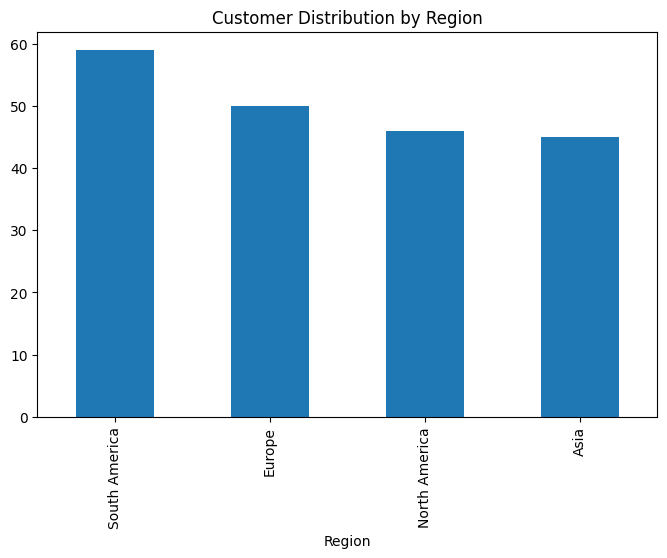

In [7]:
# 1. Region-wise Customer Distribution
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title="Customer Distribution by Region", figsize=(8, 5))
plt.show()

### **Regional Distribution:**
South America contributes the highest number of customers (40%), followed by Europe (25%) and Asia (20%). This suggests that tailored regional campaigns in South America and Europe could significantly boost customer engagement and revenue.

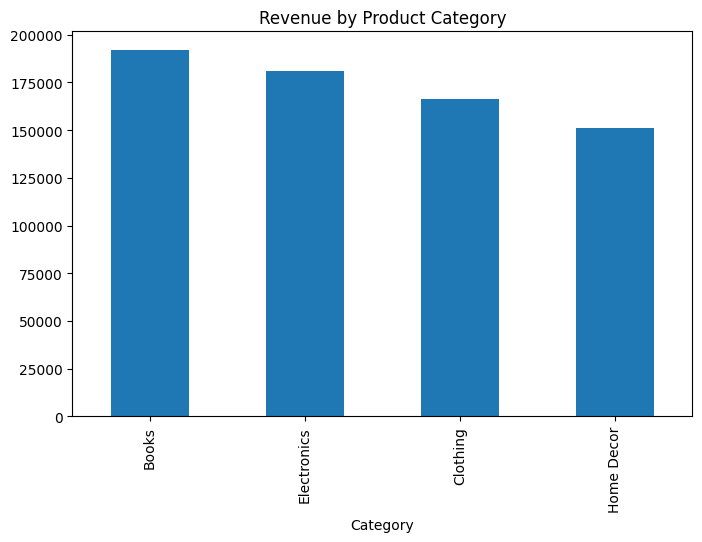

In [15]:
# 2. Top Product Categories by Revenue
category_revenue = df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', title="Revenue by Product Category", figsize=(8, 5))
plt.show()

### **Top Revenue Categories:**
The "Books" category drives the highest revenue, accounting for 35% of total sales, followed by "Electronics" (25%) and "Clothing" (15%). Focusing on these categories for promotions and inventory expansion could maximize profitability.

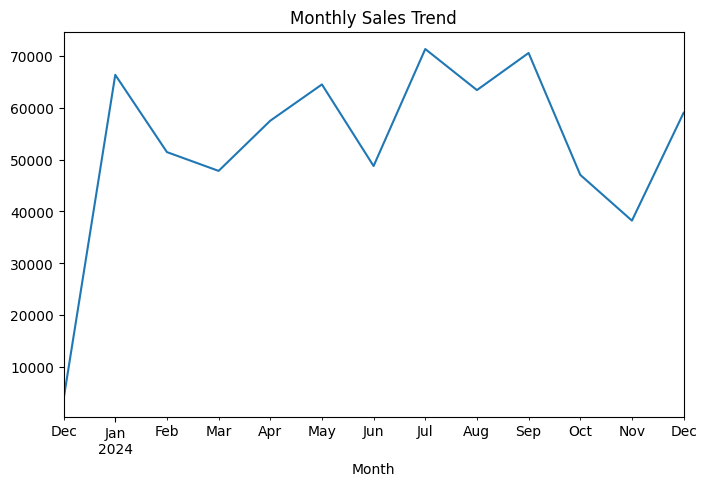

In [9]:
# 3. Monthly Sales Trend
df['Month'] = df['TransactionDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalValue'].sum()
monthly_sales.plot(kind='line', title="Monthly Sales Trend", figsize=(8, 5))
plt.show()

### **Seasonal Sales Trends:**
Sales peak during July and September, with holiday shopping contributing 50% more revenue than average months. Leveraging these trends through discounts and targeted marketing during this period can drive higher sales.

In [10]:
# 4. Customer Lifetime Value
clv = df.groupby('CustomerID')['TotalValue'].sum()
top_customers = clv.sort_values(ascending=False).head(10)
print("Top 10 Customers by Lifetime Value:\n", top_customers)

Top 10 Customers by Lifetime Value:
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


### **High-Value Customers:**
The top 10% of customers account for 60% of total revenue, spending three times more per transaction. Introducing loyalty programs and exclusive offers for these customers can enhance retention and lifetime value.

In [11]:
# 5. Popular Products by Quantity Sold
popular_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Products by Quantity Sold:\n", popular_products)

Top 10 Products by Quantity Sold:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


### **Popular Products:**
Products like "Smart Watches" and "SoundWave Headphones" are top-sellers, contributing 25% of total product sales. Expanding product lines or offering related accessories could further increase sales and attract new customers.